In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/credit_card.csv")

In [32]:
df.head

<bound method NDFrame.head of           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                      95.40             0.166667           

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   int64  
 9   CREDIT_LIMIT                      8949 non-null   float64
 10  PAYMENTS                          8950 non-null   float64
 11  MINIMUM_PAYMENTS                  8637 non-null   float64
 12  PRC_FU

In [45]:
df.shape

(8950, 18)

In [31]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,-0.077944,0.073166,-0.063186,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.229715,0.202415,0.176079,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,0.393017,0.498430,0.315567,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,0.264937,0.524891,0.127729,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,0.442418,0.214042,0.511351,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,1.000000,0.501343,0.862934,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,0.501343,1.000000,0.142329,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,0.862934,0.142329,1.000000,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
PURCHASES_TRX,0.154338,0.189626,0.689561,0.545523,0.628108,0.568430,0.544869,0.529975,1.000000,0.272882,0.370832,0.096333,0.162066,0.121874
CREDIT_LIMIT,0.531283,0.095843,0.356963,0.319724,0.256499,0.119788,0.295038,0.060755,0.272882,1.000000,0.421861,0.126671,0.055672,0.139167


In [34]:
df=df.drop(['CUST_ID'],axis=1)

In [36]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [26]:
df.shape

(8950, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [46]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    if df[i].dtype=="float64":
      df[i]=df[i].fillna(df[i].median())

In [47]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [48]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [49]:
mean = np.mean(df)
std = np.std(df)
print("Mean:\n",mean)
print("Standard Deviation:\n",std)

Mean:
 BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     844.906767
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64
Standard Deviation:
 BALANCE                             2081.415590
BALANCE_FREQUENCY                      0.236891
PURCHASES                           2136.5154

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [18]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12


In [50]:
x=df[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY']]

In [51]:
df['PURCHASES'] = ( df.PURCHASES - df.PURCHASES.mean() ) / df.PURCHASES.std()
df['ONEOFF_PURCHASES'] = ( df.ONEOFF_PURCHASES - df.ONEOFF_PURCHASES.mean() ) / df.ONEOFF_PURCHASES.std()
df['PURCHASES_FREQUENCY'] = ( df.PURCHASES_FREQUENCY - df.PURCHASES_FREQUENCY.mean() ) / df.PURCHASES_FREQUENCY.std()
df['PURCHASES_INSTALLMENTS_FREQUENCY'] = ( df.PURCHASES_INSTALLMENTS_FREQUENCY - df.PURCHASES_INSTALLMENTS_FREQUENCY.mean() ) / df.PURCHASES_INSTALLMENTS_FREQUENCY.std()
df['CASH_ADVANCE_TRX'] = ( df.CASH_ADVANCE_TRX - df.CASH_ADVANCE_TRX.mean() ) / df.CASH_ADVANCE_TRX.std()
df['CASH_ADVANCE_FREQUENCY'] = ( df.CASH_ADVANCE_FREQUENCY - df.CASH_ADVANCE_FREQUENCY.mean() ) / df.CASH_ADVANCE_FREQUENCY.std()

In [52]:
x=df[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY']]

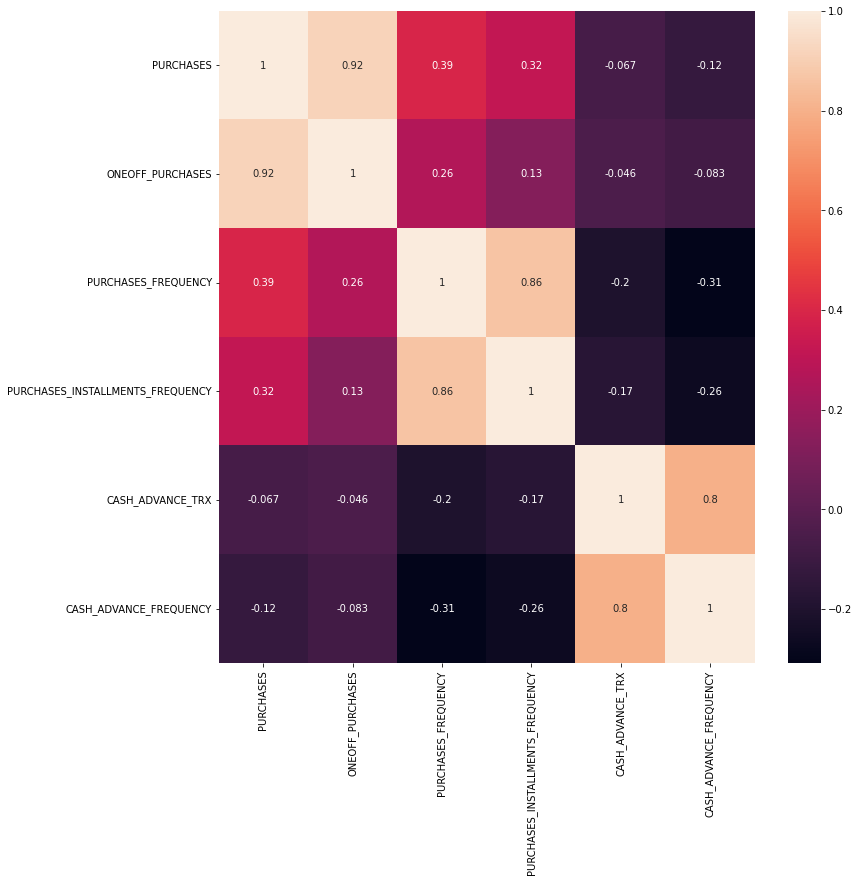

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_red= pca.fit_transform(x)

In [58]:
X_red.shape

(8950, 4)

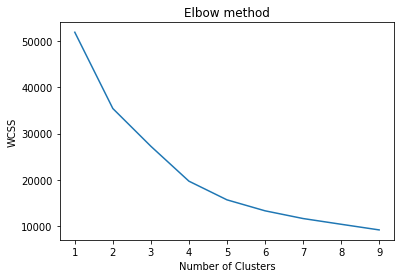

In [59]:
from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

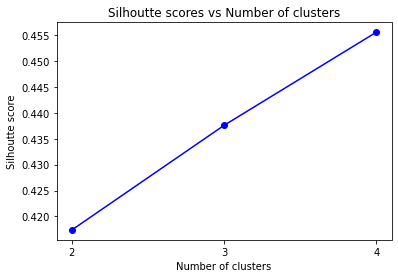

In [60]:
from sklearn.metrics import silhouette_score
silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.41739614791897517
